In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mtp

In [21]:
df=pd.read_csv(r"C:\Users\admin\Desktop\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [23]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df.shape

(400, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
x = df.iloc[:,2:4]
y = df.iloc[:,4]

In [28]:
print(x)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [32]:
scale = StandardScaler()

In [33]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [34]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

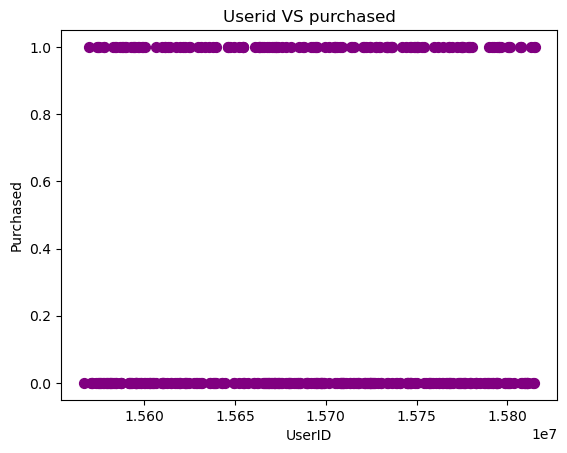

In [35]:
x1=df.iloc[:, 0].values
y1=df.iloc[:, 4].values
mtp.scatter(x1,y1,color='purple',s=50)
mtp.xlabel('UserID')
mtp.ylabel('Purchased')
mtp.title('Userid VS purchased')
mtp.show()

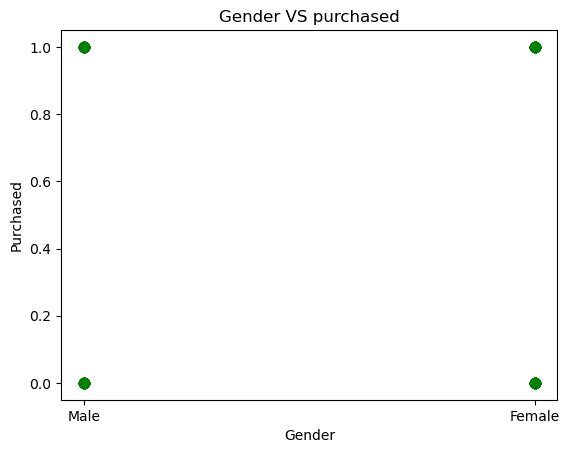

In [36]:
x2=df.iloc[:, 1].values
y2=df.iloc[:, 4].values
mtp.scatter(x2,y2,color='green',s=50)
mtp.xlabel('Gender')
mtp.ylabel('Purchased')
mtp.title('Gender VS purchased')
mtp.show()

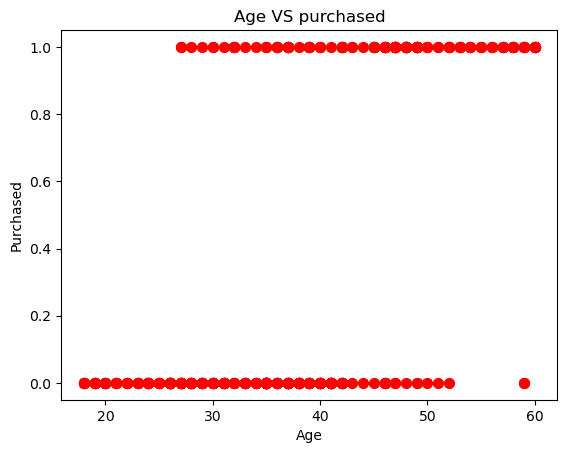

In [37]:
x3=df.iloc[:, 2].values
y3=df.iloc[:, 4].values
mtp.scatter(x3,y3,color='red',s=50)
mtp.xlabel('Age')
mtp.ylabel('Purchased')
mtp.title('Age VS purchased')
mtp.show()

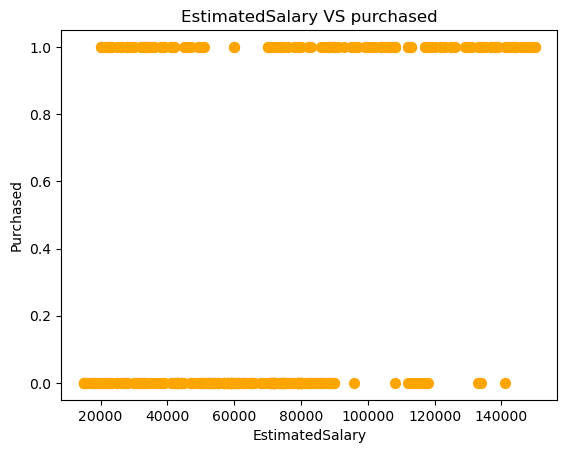

In [38]:
x4=df.iloc[:, 3].values
y4=df.iloc[:, 4].values
mtp.scatter(x4,y4,color='orange',s=50)
mtp.xlabel('EstimatedSalary')
mtp.ylabel('Purchased')
mtp.title('EstimatedSalary VS purchased')
mtp.show()

In [39]:
mtp.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

C:\Users\admin\AppData\Local\Temp\ipykernel_12296\4057559933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')


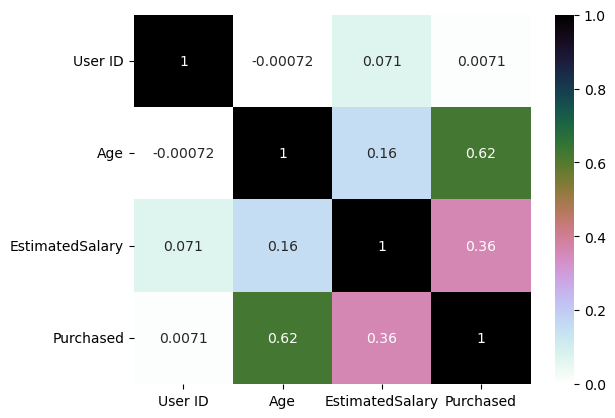

In [40]:
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
mtp.show()

In [41]:
matrix = confusion_matrix(y_test, pred, labels= lr.classes_)

In [42]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)

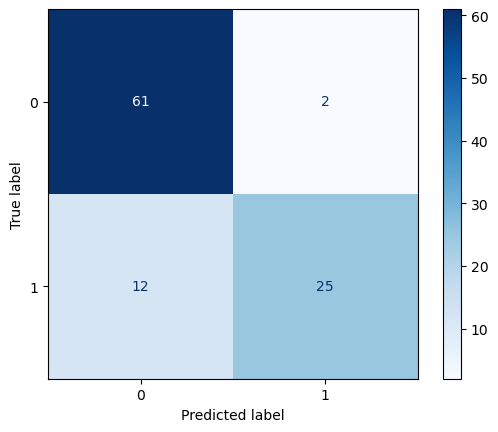

In [43]:
conf_matrix.plot(cmap=mtp.cm.Blues)
mtp.show()